### Objective : 
- To describe the opposing effects of leptin and adiponectin on cancer and Alzheimer's, to outline signaling pathways involved in these effects and to suggest new research on effective control strategies for both diseases.

In [543]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings("ignore")

In [544]:
cancer_csv_file = "death_cancer.csv"
cancer_df = pd.read_csv(cancer_csv_file)
cancer_df = cancer_df[cancer_df["YEAR"]==2019].sort_values(by=['RATE']).set_index("STATE")
cancer_df

,YEAR,RATE,DEATHS,URL
STATE,,,,
UT,2019.0,117.2,3289,/nchs/pressroom/states/utah/ut.htm
CO,2019.0,125.9,7986,/nchs/pressroom/states/colorado/co.htm
HI,2019.0,127.3,2500,/nchs/pressroom/states/hawaii/hi.htm
AZ,2019.0,131.1,12503,/nchs/pressroom/states/arizona/az.htm
CA,2019.0,131.6,59512,/nchs/pressroom/states/california/ca.htm
CT,2019.0,131.9,6496,/nchs/pressroom/states/connecticut/ct.htm
NM,2019.0,131.9,3614,/nchs/pressroom/states/newmexico/nm.htm
NY,2019.0,132.9,33655,/nchs/pressroom/states/newyork/ny.htm
NJ,2019.0,136.5,15698,/nchs/pressroom/states/newjersey/nj.htm


In [545]:
alzheimer_csv_file = "death_alzheimer.csv"
alzheimer_df = pd.read_csv(alzheimer_csv_file)
alzheimer_df = alzheimer_df[alzheimer_df["YEAR"]==2019].sort_values(by=['RATE']).set_index("STATE")
alzheimer_df

,YEAR,RATE,DEATHS,URL
STATE,,,,
NY,2019.0,13.7,3753,/nchs/pressroom/states/newyork/ny.htm
MD,2019.0,13.8,1012,/nchs/pressroom/states/maryland/md.htm
MA,2019.0,17.7,1663,/nchs/pressroom/states/massachusetts/ma.htm
CT,2019.0,18.1,967,/nchs/pressroom/states/connecticut/ct.htm
FL,2019.0,18.3,6539,/nchs/pressroom/states/florida/fl.htm
HI,2019.0,19.1,471,/nchs/pressroom/states/hawaii/hi.htm
PA,2019.0,21.2,4150,/nchs/pressroom/states/pennsylvania/pa.htm
NM,2019.0,21.3,568,/nchs/pressroom/states/newmexico/nm.htm
NV,2019.0,21.6,678,/nchs/pressroom/states/nevada/nv.htm


In [546]:
obesity_csv_file = "obesity_percentage.csv"
obesity_df = pd.read_csv(obesity_csv_file)
obesity_df = obesity_df.set_index("state")
obesity_df

,year,%
state,,
AL,2019,36.1
AK,2019,30.5
AZ,2019,31.4
AR,2019,37.4
CA,2019,26.2
CO,2019,23.8
CT,2019,29.1
DE,2019,34.4
DC,2019,23.8


In [547]:
diabetes_csv_file = "death_diabetes.csv"
diabetes_df = pd.read_csv(diabetes_csv_file)
diabetes_df = diabetes_df[diabetes_df["YEAR"]==2019].sort_values(by=['RATE']).set_index("STATE")
diabetes_df

,YEAR,RATE,DEATHS,URL
STATE,,,,
MA,2019.0,15.3,1383,/nchs/pressroom/states/massachusetts/ma.htm
VT,2019.0,15.5,136,/nchs/pressroom/states/vermont/vt.htm
CT,2019.0,15.6,761,/nchs/pressroom/states/connecticut/ct.htm
HI,2019.0,15.8,311,/nchs/pressroom/states/hawaii/hi.htm
AK,2019.0,16.2,111,/nchs/pressroom/states/alaska/ak.htm
CO,2019.0,16.4,1046,/nchs/pressroom/states/colorado/co.htm
NJ,2019.0,16.7,1934,/nchs/pressroom/states/newjersey/nj.htm
NY,2019.0,18.0,4564,/nchs/pressroom/states/newyork/ny.htm
IL,2019.0,18.1,2825,/nchs/pressroom/states/illinois/il.htm


In [548]:
hypertension_csv_file = "death_hypertension.csv"
hypertension_df = pd.read_csv(hypertension_csv_file)
hypertension_df = hypertension_df[hypertension_df["YEAR"]==2019].sort_values(by=['RATE']).set_index("STATE")
hypertension_df

,YEAR,RATE,DEATHS,URL
STATE,,,,
NM,2019.0,5.2,145,/nchs/pressroom/states/newmexico/nm.htm
NH,2019.0,5.5,106,/nchs/pressroom/states/newhampshire/nh.htm
WY,2019.0,5.6,39,/nchs/pressroom/states/wyoming/wy.htm
MT,2019.0,5.7,85,/nchs/pressroom/states/montana/mt.htm
ME,2019.0,5.8,120,/nchs/pressroom/states/maine/me.htm
LA,2019.0,5.8,311,/nchs/pressroom/states/louisiana/la.htm
RI,2019.0,5.9,88,/nchs/pressroom/states/rhodeisland/ri.htm
MO,2019.0,5.9,472,/nchs/pressroom/states/missouri/mo.htm
PA,2019.0,6.0,1128,/nchs/pressroom/states/pennsylvania/pa.htm


In [549]:
obesity_states = obesity_df.index
obesity_states

Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY'],
      dtype='object', name='state')

In [550]:
obesity_rate = obesity_df["%"]
obesity_rate

state
AL    36.1
AK    30.5
AZ    31.4
AR    37.4
CA    26.2
CO    23.8
CT    29.1
DE    34.4
DC    23.8
FL    27.0
GA    33.1
HI    25.0
ID    29.5
IL    31.6
IN    35.3
IA    33.9
KS    35.2
KY    36.5
LA    35.9
ME    31.7
MD    32.3
MA    25.2
MI    36.0
MN    30.1
MS    40.8
MO    34.8
MT    28.3
NE    34.1
NV    30.6
NH    31.8
NJ     NaN
NM    31.7
NY    27.1
NC    34.0
ND    34.8
OH    34.8
OK    36.8
OR    29.0
PA    33.2
RI    30.0
SC    35.4
SD    33.0
TN    36.5
TX    34.0
UT    29.2
VT    26.6
VA    31.9
WA    28.3
WV    39.7
WI    34.2
WY    29.7
Name: %, dtype: float64

In [551]:
cancer_states = cancer_df.index
cancer_states

Index(['UT', 'CO', 'HI', 'AZ', 'CA', 'CT', 'NM', 'NY', 'NJ', 'ID', 'WY', 'FL',
       'MA', 'ND', 'MT', 'TX', 'MN', 'WA', 'MD', 'VA', 'OR', 'AK', 'NE', 'NH',
       'NV', 'WI', 'VT', 'IA', 'GA', 'IL', 'DE', 'NC', 'SD', 'PA', 'RI', 'KS',
       'SC', 'MI', 'MO', 'AL', 'OH', 'IN', 'ME', 'AR', 'TN', 'LA', 'OK', 'WV',
       'KY', 'MS'],
      dtype='object', name='STATE')

In [552]:
cancer_death_rate = cancer_df["RATE"]
cancer_death_rate

STATE
UT    117.2
CO    125.9
HI    127.3
AZ    131.1
CA    131.6
CT    131.9
NM    131.9
NY    132.9
NJ    136.5
ID    138.1
WY    138.9
FL    139.1
MA    139.9
ND    140.7
MT    140.9
TX    141.4
MN    142.2
WA    143.4
MD    144.4
VA    144.9
OR    145.0
AK    146.9
NE    147.4
NH    147.4
NV    149.0
WI    149.6
VT    150.4
IA    150.9
GA    151.4
IL    151.9
DE    151.9
NC    152.0
SD    153.4
PA    153.5
RI    153.6
KS    153.8
SC    154.0
MI    157.1
MO    159.7
AL    160.8
OH    163.0
IN    163.4
ME    164.2
AR    165.7
TN    167.0
LA    168.1
OK    173.0
WV    175.0
KY    176.4
MS    179.1
Name: RATE, dtype: float64

In [553]:
alzheimer_states = alzheimer_df.index
alzheimer_states

Index(['NY', 'MD', 'MA', 'CT', 'FL', 'HI', 'PA', 'NM', 'NV', 'NJ', 'KS', 'MT',
       'IL', 'AK', 'DE', 'ME', 'VA', 'NH', 'RI', 'IA', 'NE', 'WI', 'IN', 'KY',
       'WV', 'AZ', 'ID', 'CO', 'OH', 'MI', 'MO', 'WY', 'MN', 'VT', 'NC', 'CA',
       'OR', 'ND', 'OK', 'SC', 'TX', 'UT', 'AR', 'SD', 'TN', 'LA', 'GA', 'WA',
       'AL', 'MS'],
      dtype='object', name='STATE')

In [554]:
alzheimer_death_rate = alzheimer_df["RATE"]
alzheimer_death_rate

STATE
NY    13.7
MD    13.8
MA    17.7
CT    18.1
FL    18.3
HI    19.1
PA    21.2
NM    21.3
NV    21.6
NJ    21.7
KS    21.9
MT    22.6
IL    24.5
AK    25.3
DE    25.9
ME    25.9
VA    26.9
NH    27.8
RI    28.9
IA    29.2
NE    30.3
WI    30.5
IN    31.6
KY    32.1
WV    32.3
AZ    32.3
ID    33.2
CO    33.4
OH    33.6
MI    33.9
MO    34.1
WY    34.4
MN    34.9
VT    35.1
NC    36.9
CA    37.0
OR    37.2
ND    37.6
OK    37.9
SC    37.9
TX    38.6
UT    39.0
AR    39.5
SD    40.5
TN    41.1
LA    41.4
GA    41.9
WA    42.2
AL    44.6
MS    48.8
Name: RATE, dtype: float64

# Relationship Between Cancer and Obesity

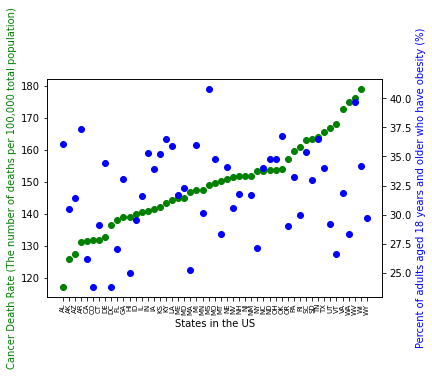

In [555]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(cancer_states, cancer_death_rate, color="green")


ax2.scatter(obesity_states, obesity_rate, color="blue")

ax1.set_xlabel('States in the US')
ax1.set_ylabel('Cancer Death Rate (The number of deaths per 100,000 total population)', color='g')
ax2.set_ylabel('Percent of adults aged 18 years and older who have obesity (%)', color='b')

#fig.xticks(rotation=90)
#plt.xticks(fontsize=7)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(7)


plt.show()
fig.savefig("cancer_obesity.png")

# Relationship between Alzheimer's Disease and Obesity

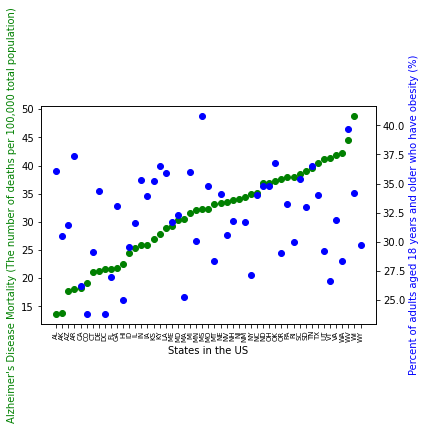

In [556]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(alzheimer_states, alzheimer_death_rate, color="green")


ax2.scatter(obesity_states, obesity_rate, color="blue")

ax1.set_xlabel('States in the US')
ax1.set_ylabel('Alzheimer\'s Disease Mortality (The number of deaths per 100,000 total population)', color='g')
ax2.set_ylabel('Percent of adults aged 18 years and older who have obesity (%)', color='b')

#fig.xticks(rotation=90)
#plt.xticks(fontsize=7)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(7)


plt.show()
fig.savefig("alzheimer_obesity.png")

In [557]:
cancer_rate = cancer_df[cancer_df["YEAR"]==2019].sort_values(by=['STATE'])[["RATE"]]
cancer_rate

,RATE
STATE,
AK,146.9
AL,160.8
AR,165.7
AZ,131.1
CA,131.6
CO,125.9
CT,131.9
DE,151.9
FL,139.1


In [558]:
alzheimer_rate = alzheimer_df[alzheimer_df["YEAR"]==2019].sort_values(by=['STATE'])[["RATE"]]
alzheimer_rate

,RATE
STATE,
AK,25.3
AL,44.6
AR,39.5
AZ,32.3
CA,37.0
CO,33.4
CT,18.1
DE,25.9
FL,18.3


#### As there is a heavy correlation with diabetes and hypertension between obesity, I have decided to include both of these datasets to see if there is any further correlation.

In [559]:
diabetes_rate = diabetes_df[diabetes_df["YEAR"]==2019].sort_values(by=['STATE'])[["RATE"]]
diabetes_rate

,RATE
STATE,
AK,16.2
AL,19.8
AR,29.8
AZ,23.4
CA,21.8
CO,16.4
CT,15.6
DE,20.5
FL,19.3


In [560]:
hypertension_rate = hypertension_df[hypertension_df["YEAR"]==2019].sort_values(by=['STATE'])[["RATE"]]
hypertension_rate

,RATE
STATE,
AK,8.7
AL,10.3
AR,9.5
AZ,10.7
CA,12.2
CO,6.7
CT,6.2
DE,6.9
FL,8.2


In [561]:
data = {
    "cancer_rate": cancer_rate["RATE"],
    "alzheimer_rate": alzheimer_rate["RATE"],
    "diabetes_rate": diabetes_rate["RATE"],
    "hypertension_rate": hypertension_rate["RATE"],

    "obesity_rate": obesity_rate
}

In [562]:
data_df = pd.DataFrame(data)
data_df

,cancer_rate,alzheimer_rate,diabetes_rate,hypertension_rate,obesity_rate
AK,146.9,25.3,16.2,8.7,30.5
AL,160.8,44.6,19.8,10.3,36.1
AR,165.7,39.5,29.8,9.5,37.4
AZ,131.1,32.3,23.4,10.7,31.4
CA,131.6,37.0,21.8,12.2,26.2
CO,125.9,33.4,16.4,6.7,23.8
CT,131.9,18.1,15.6,6.2,29.1
DC,NaN,NaN,NaN,NaN,23.8
DE,151.9,25.9,20.5,6.9,34.4
FL,139.1,18.3,19.3,8.2,27.0


## Correlation among Three Factors (Cancer, Alzheimer's, and Obesity)
### Added diabetes and hypertension rates to correlation as both might be correlated to obesity.

In [563]:
corr_df = data_df.corr()
corr_df

,cancer_rate,alzheimer_rate,diabetes_rate,hypertension_rate,obesity_rate
cancer_rate,1.000000,0.386556,0.639642,0.197815,0.803682
alzheimer_rate,0.386556,1.000000,0.468549,0.372271,0.442926
diabetes_rate,0.639642,0.468549,1.000000,0.292290,0.751869
hypertension_rate,0.197815,0.372271,0.292290,1.000000,0.212240
obesity_rate,0.803682,0.442926,0.751869,0.212240,1.000000


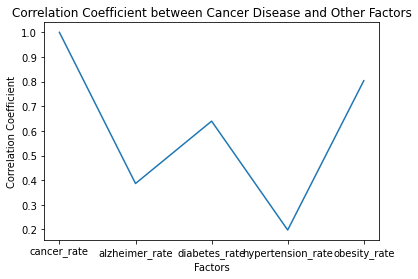

In [564]:
plt.plot(corr_df.index, corr_df["cancer_rate"])
plt.title("Correlation Coefficient between Cancer Disease and Other Factors")
plt.xlabel("Factors")
plt.ylabel("Correlation Coefficient")
plt.savefig("Correlation_Data.png")

### Bivariate Analysis

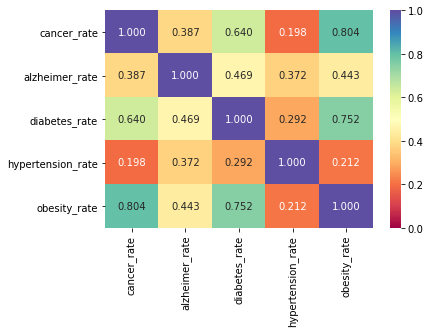

In [594]:
sns.heatmap(corr_df, annot=True, vmin=0, vmax=1, fmt=".3f", cmap="Spectral")
plt.show()

- There are strong correlations between the following:
    - Cancer and Obesity
    - Diabetes and Obesity
    - Cancer and Diabetes
- There is a lesser but still noticeable correlation between the following : 
    - Alzheimer's and Diabetes
    - Alzheimer's and Obesity
    - Alzheimer's and Cancer
- There is little to no correlation between the following: 
    - Hypertension and Diabetes
    - Cancer and Hypertension
    - Obesity and Hypertension

In [566]:
data_df["state"] = data_df.index

In [567]:
data_df

,cancer_rate,alzheimer_rate,diabetes_rate,hypertension_rate,obesity_rate,state
AK,146.9,25.3,16.2,8.7,30.5,AK
AL,160.8,44.6,19.8,10.3,36.1,AL
AR,165.7,39.5,29.8,9.5,37.4,AR
AZ,131.1,32.3,23.4,10.7,31.4,AZ
CA,131.6,37.0,21.8,12.2,26.2,CA
CO,125.9,33.4,16.4,6.7,23.8,CO
CT,131.9,18.1,15.6,6.2,29.1,CT
DC,NaN,NaN,NaN,NaN,23.8,DC
DE,151.9,25.9,20.5,6.9,34.4,DE
FL,139.1,18.3,19.3,8.2,27.0,FL


In [568]:
df = data_df.dropna()

- Using the dropna() function we can drop the rows that have null or NaN values to help clean up the data for our analyses.

In [569]:
df.isnull().sum()

cancer_rate          0
alzheimer_rate       0
diabetes_rate        0
hypertension_rate    0
obesity_rate         0
state                0
dtype: int64

- We can see now that we have no null/ NaN values.

In [570]:
df.reset_index(drop=True, inplace=True)

- We need to reset the index since we have dropped two rows so the index will be correct according to the new dataset size.

In [571]:
df

,cancer_rate,alzheimer_rate,diabetes_rate,hypertension_rate,obesity_rate,state
0,146.9,25.3,16.2,8.7,30.5,AK
1,160.8,44.6,19.8,10.3,36.1,AL
2,165.7,39.5,29.8,9.5,37.4,AR
3,131.1,32.3,23.4,10.7,31.4,AZ
4,131.6,37.0,21.8,12.2,26.2,CA
5,125.9,33.4,16.4,6.7,23.8,CO
6,131.9,18.1,15.6,6.2,29.1,CT
7,151.9,25.9,20.5,6.9,34.4,DE
8,139.1,18.3,19.3,8.2,27.0,FL
9,151.4,41.9,20.5,10.5,33.1,GA


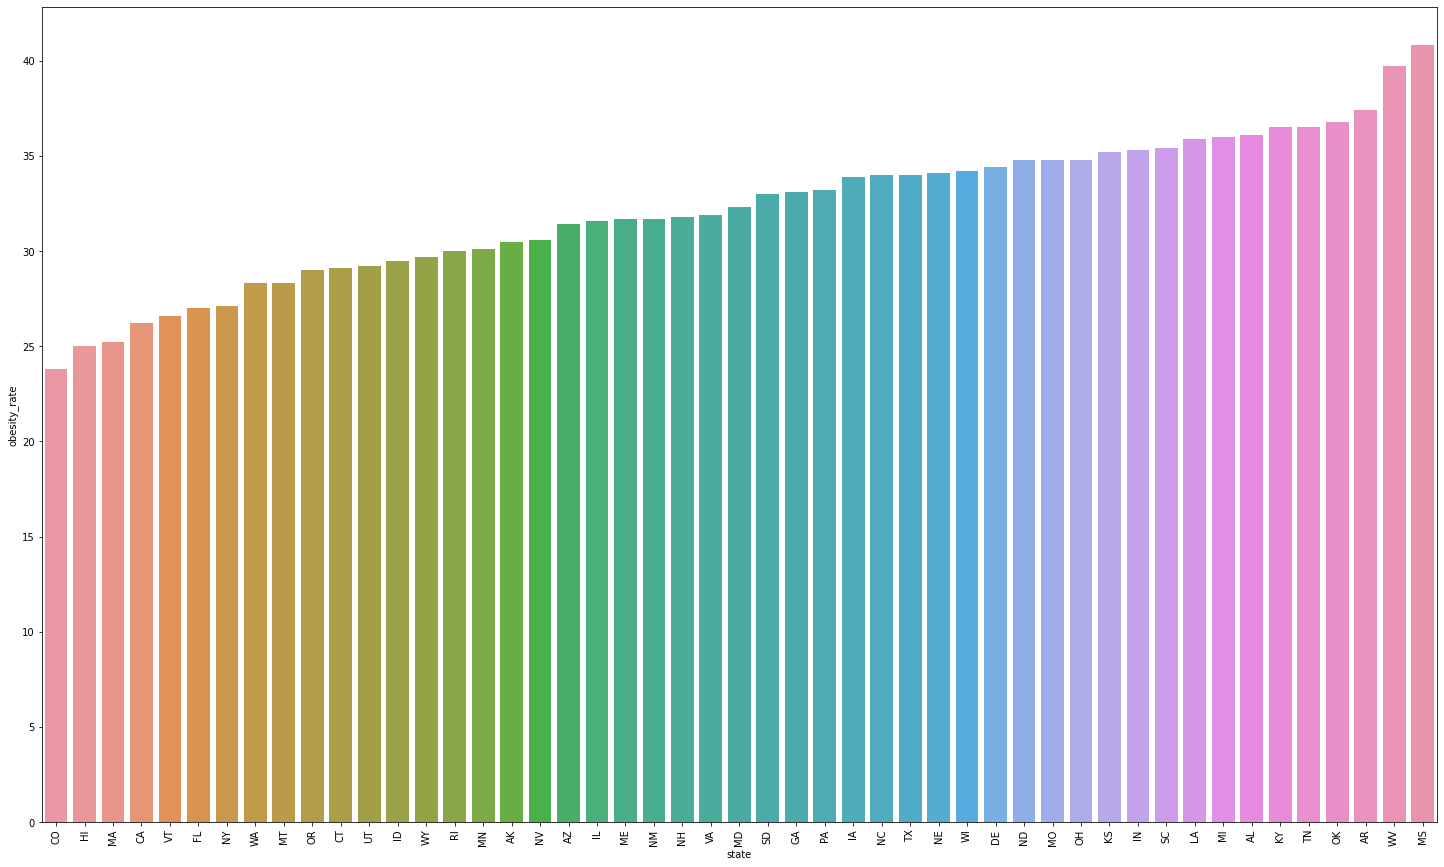

In [572]:
df_sorted = df.sort_values('obesity_rate')
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted,x="state", y="obesity_rate")
plt.xticks(rotation=90);


- When looking at the barplot above we can see the highest rate of obesity by state in ascending order.  The states with top 5 obesity rates are:
    1. MS {Mississippi}
    2. WV {West Virginia}
    3. AR {Arkansas}
    4. OK {Oklahoma}
    5. TN {Tennessee}


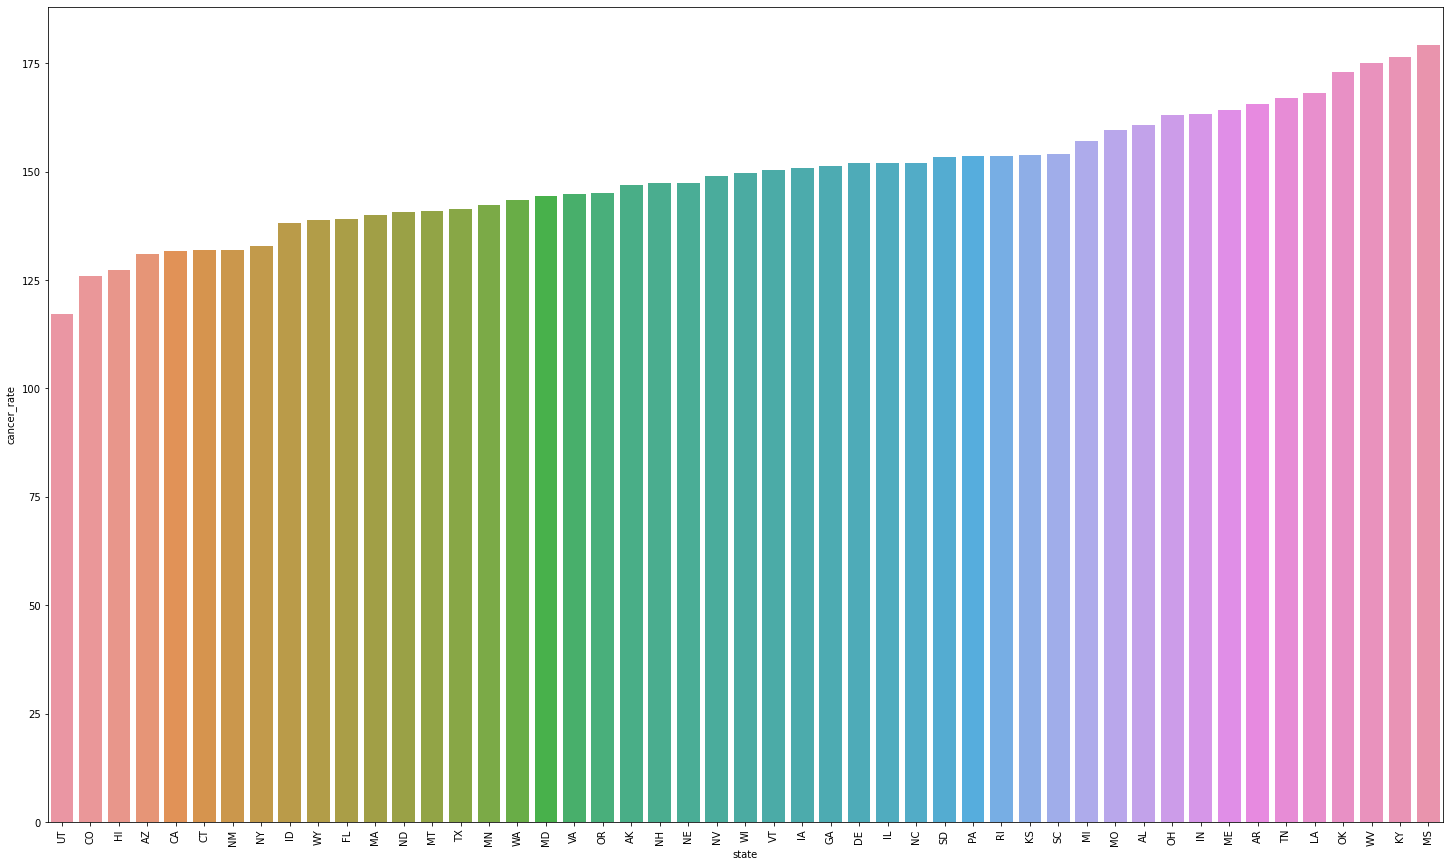

In [573]:
df_sorted = df.sort_values('cancer_rate')
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted,x="state", y="cancer_rate")
plt.xticks(rotation=90);

- When looking at the barplot above we can see the highest rate of cancer by state in ascending order.  The states with top 5 cancer rates are:
    1. MS {Mississippi}
    2. KY {Kentucky}
    3. WV {West Virginia}
    4. OK {Oklahoma}
    5. LA {Louisiana}

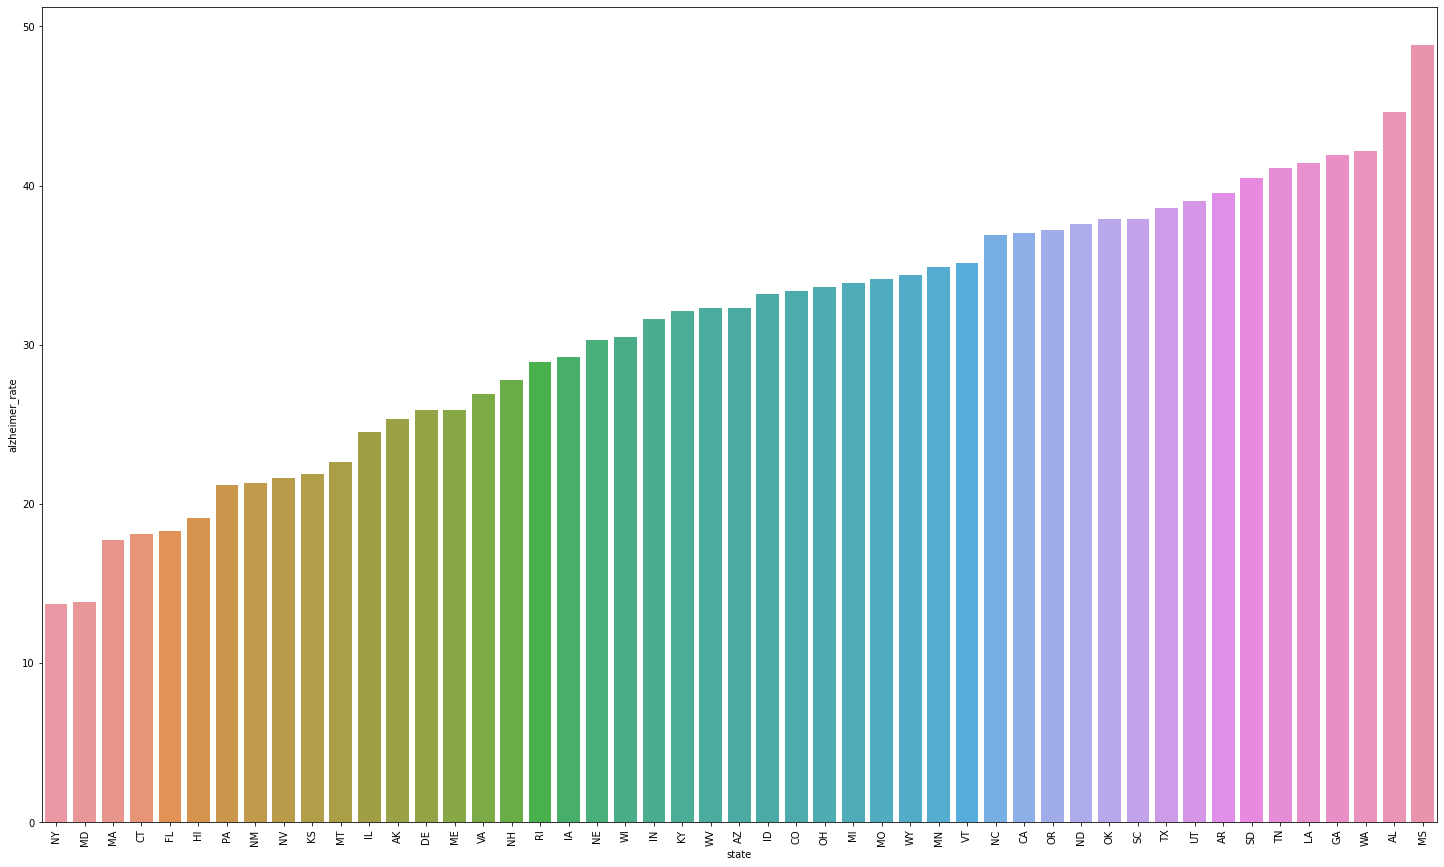

In [574]:
df_sorted = df.sort_values('alzheimer_rate')
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted,x="state", y="alzheimer_rate")
plt.xticks(rotation=90);

- When looking at the barplot above we can see the highest rate of Alzheimer's by state in ascending order.  The states with top 5 Alzheimer's rates are:
    1. MS {Mississippi}
    2. AL {Alabama}
    3. WA {Washington}
    4. GA {Georgia}
    5. LA {Louisiana}


<AxesSubplot:xlabel='obesity_rate', ylabel='cancer_rate'>

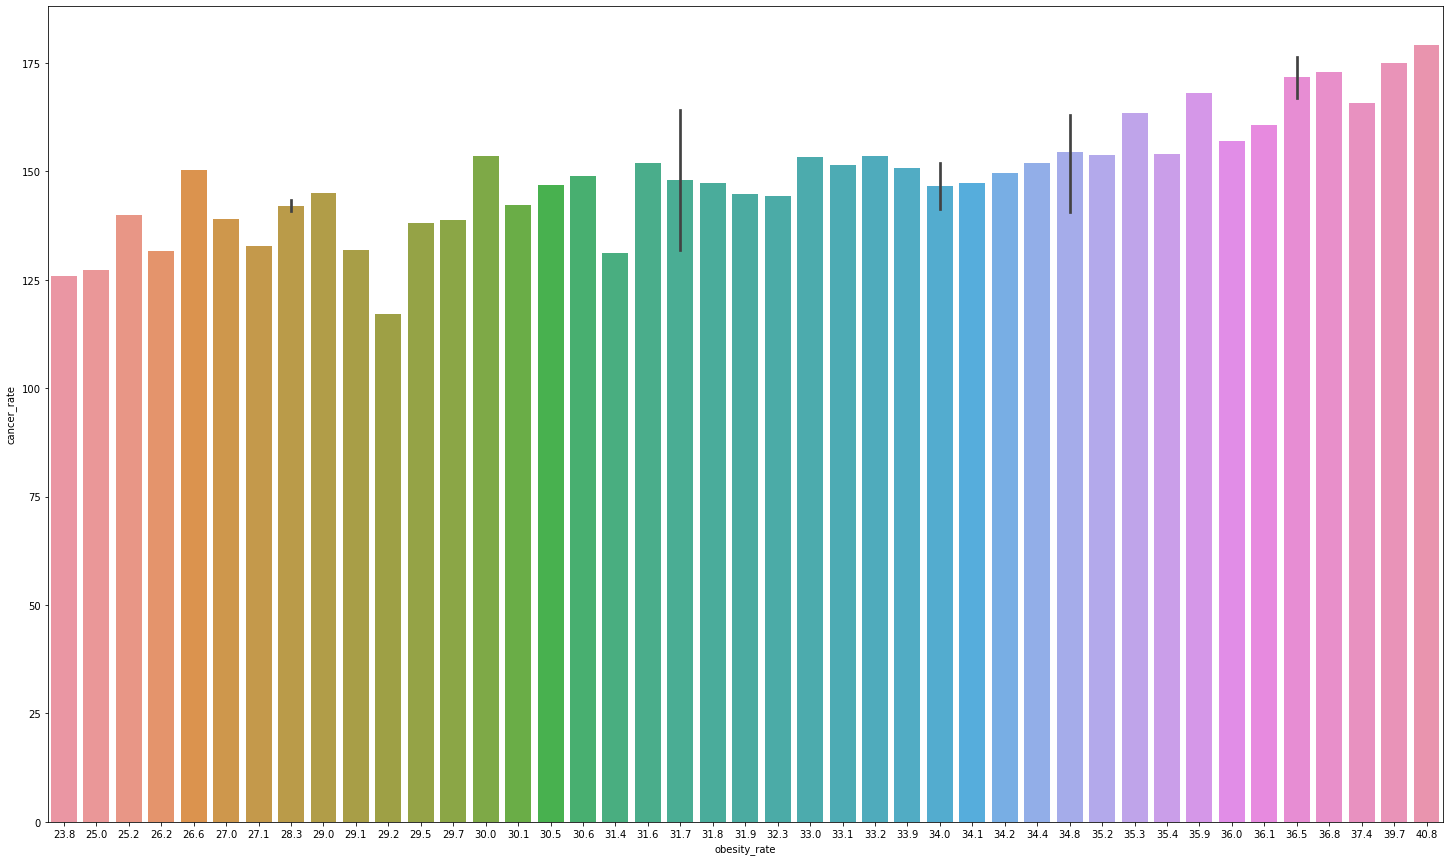

In [604]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df, x="obesity_rate", y="cancer_rate")

- When looking at the barplot above we can see the rate of Cancer vs Obesity.  We can see that there is a definitive increase in Cancer rates with higher Obesity rates. 

<AxesSubplot:xlabel='hypertension_rate', ylabel='cancer_rate'>

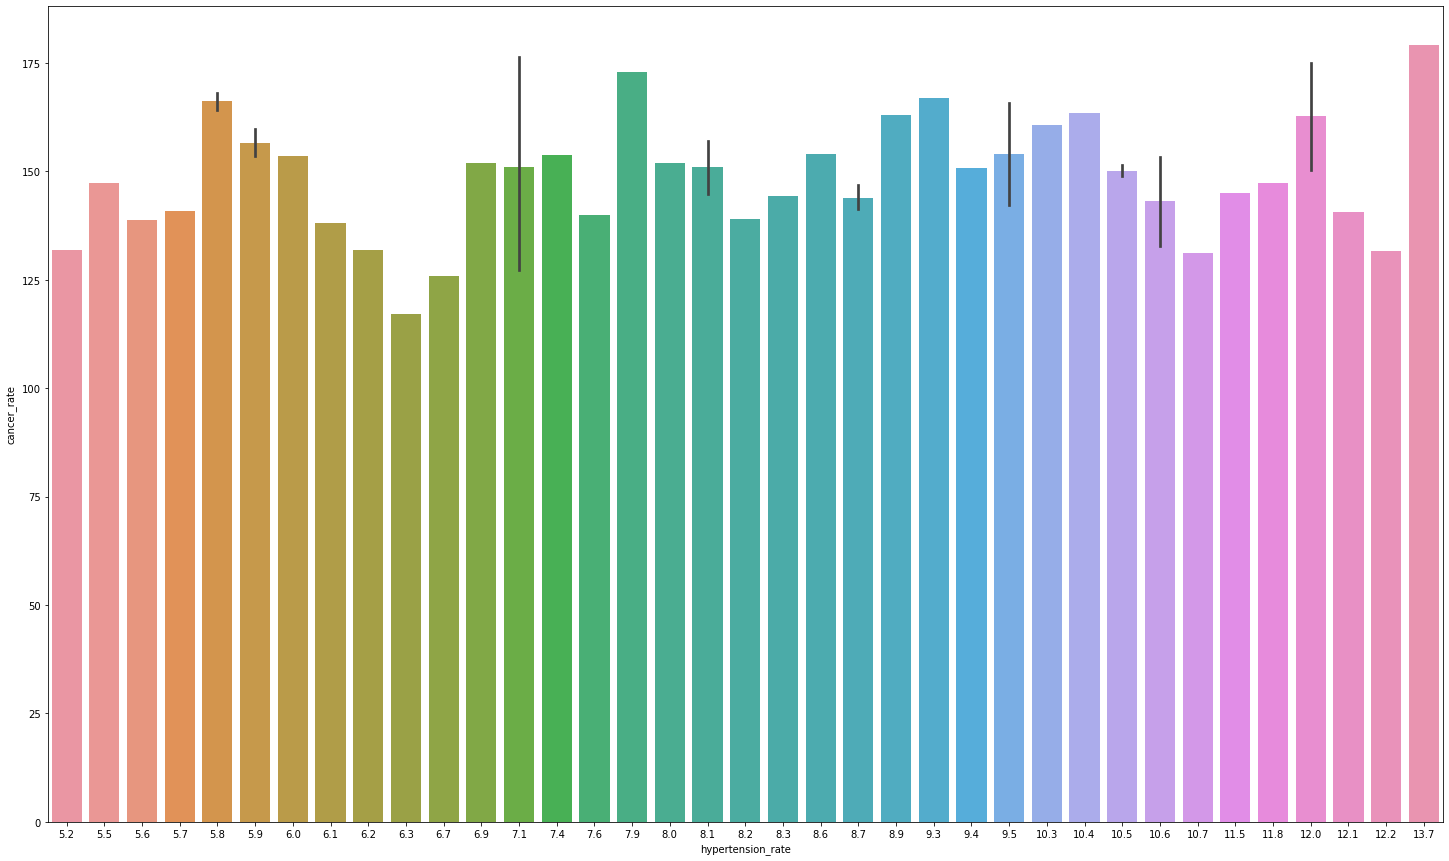

In [597]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted, x="hypertension_rate", y="cancer_rate")

- When looking at the barplot above we can see the rate of Cancer vs Hypertension.  We notice that there does not seem to be a significant correlation between Cancer and Hypertension. Although it should be noted that the highest rate of Hypertension also has the highest rate of Cancer.


<AxesSubplot:xlabel='diabetes_rate', ylabel='cancer_rate'>

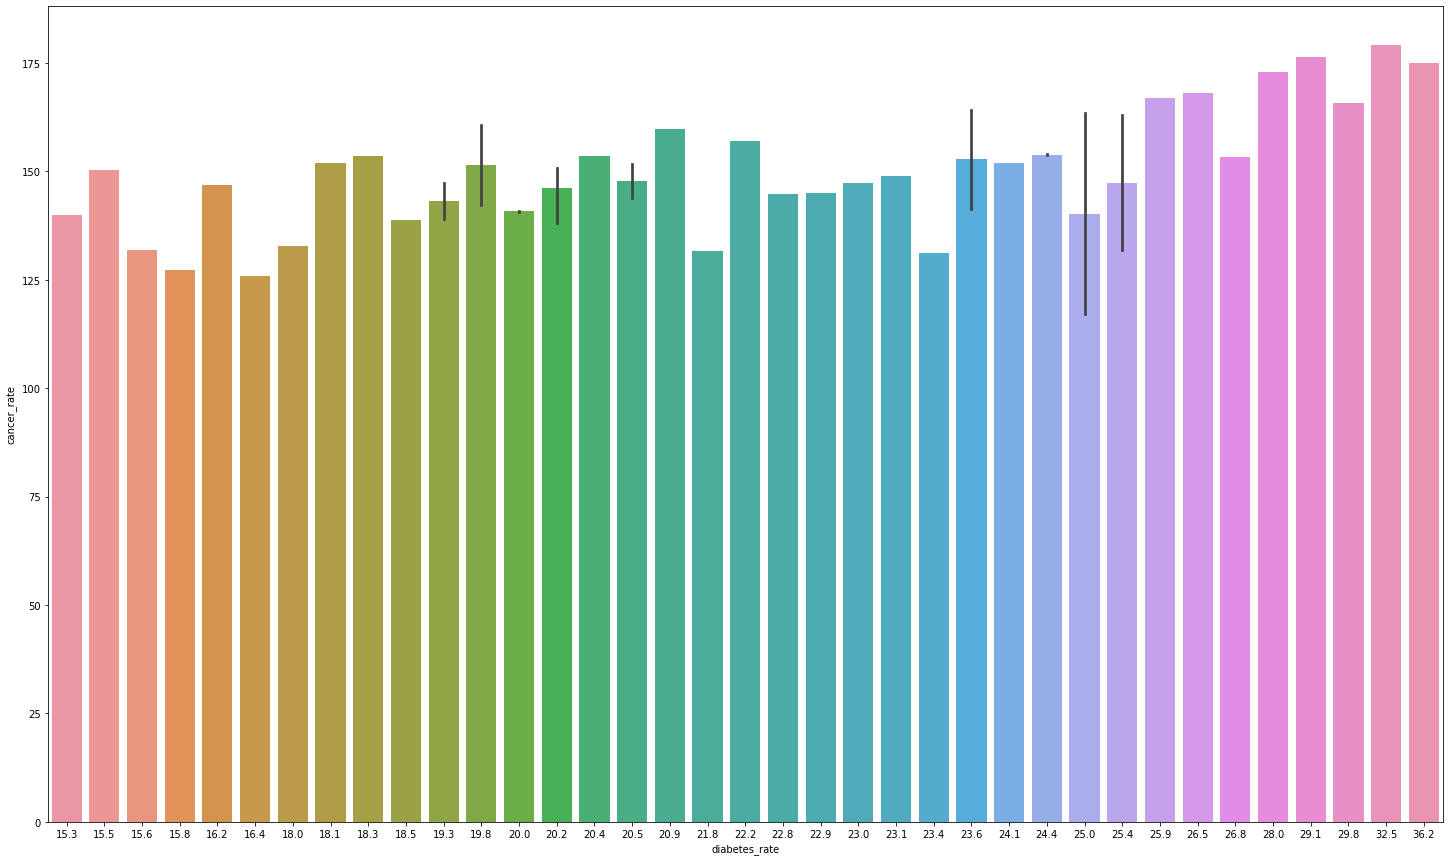

In [598]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted, x="diabetes_rate", y="cancer_rate")

- When looking at the barplot above we can see the rate of Cancer vs Diabetes.  We notice that there does seem to be somewhat a correlation between increase of Cancer rate and Diabetes rate. Although it should be noted that the top 8 highest rates of Diabetes also has the highest rate of Cancer.


<AxesSubplot:xlabel='hypertension_rate', ylabel='alzheimer_rate'>

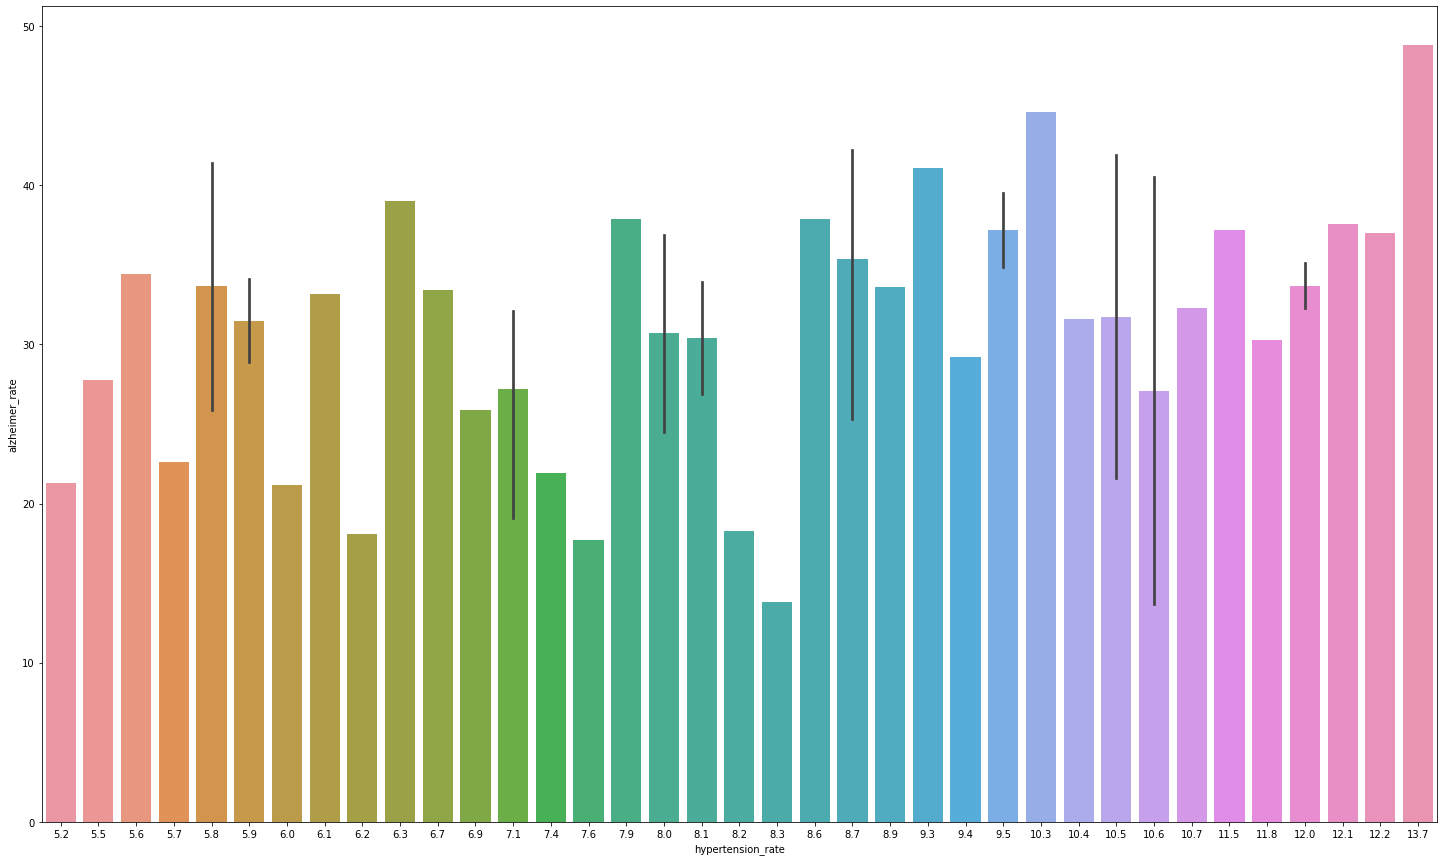

In [599]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted, x="hypertension_rate", y="alzheimer_rate")

- When looking at the Alzheimer's vs Hypertension there appears to be no significant correlation as the Hypertension rate increases.  We do see some interesting trends and notice spikes of higher Cancer rates starting with the following Hypertension values : 
    1. 6.3
    2. 7.9
    3. 8.6
    4. 9.3
    5. 10.3
    6. 13.7

- It should be noted that the highest rate of hypertension also has the highest cancer rate.

<AxesSubplot:xlabel='diabetes_rate', ylabel='alzheimer_rate'>

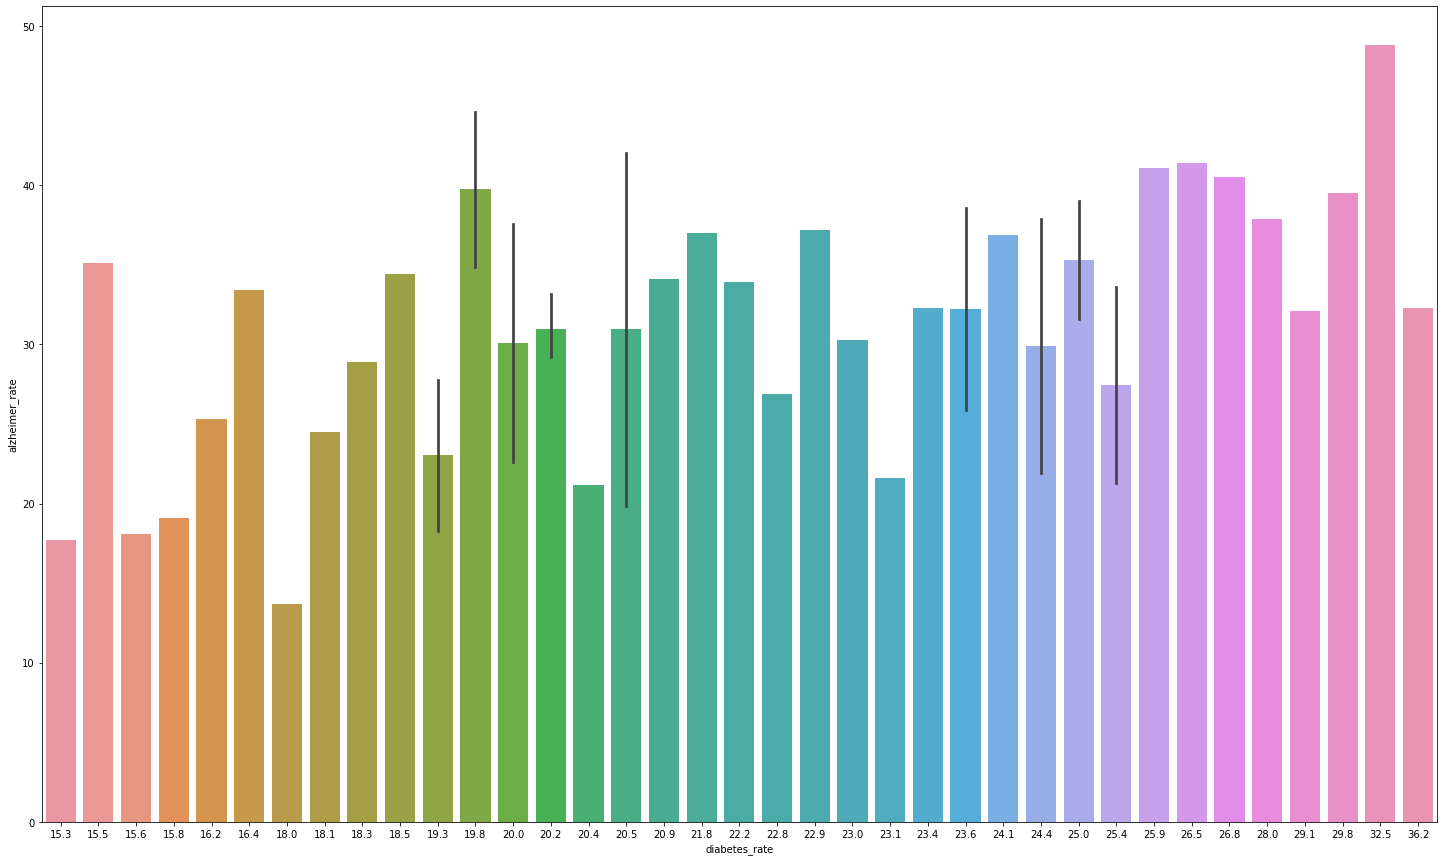

In [600]:
plt.figure(figsize=(25, 15))
sns.barplot(data=df_sorted, x="diabetes_rate", y="alzheimer_rate")

- From the above barplot we can see a similar trend as the previous one, however this one appears slightly more random with more dramatic spikes occurring.  We should however note that the top 8 highest rates of diabetes do appear (on average) to have the highest rate of cancer.  we do notice huge outlier spikes of alzheimer's in the low diabetes rate of 15.5 and 19.8

<Figure size 1800x1080 with 0 Axes>

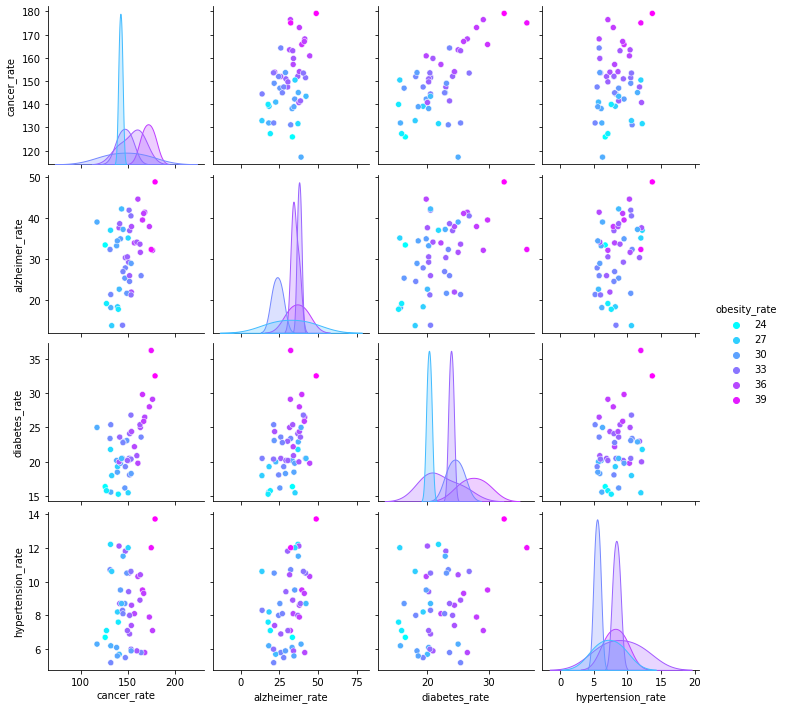

In [576]:
plt.figure(figsize=(25, 15))
sns.pairplot(df, diag_kind="kde", hue="obesity_rate", palette="cool")
plt.show()

#### KDE plots: 
- In the following KDE plots comparing Cancer, Alzheimer's, Diabetes, and Hypertension all compared to Obesity, we can see that excluding outliers, there seems to be a strong indication of a upper mid level of obesity in the range of  30-35 to be strongly correlated to all of the aforementioned morbidities. 

<AxesSubplot:xlabel='cancer_rate', ylabel='obesity_rate'>

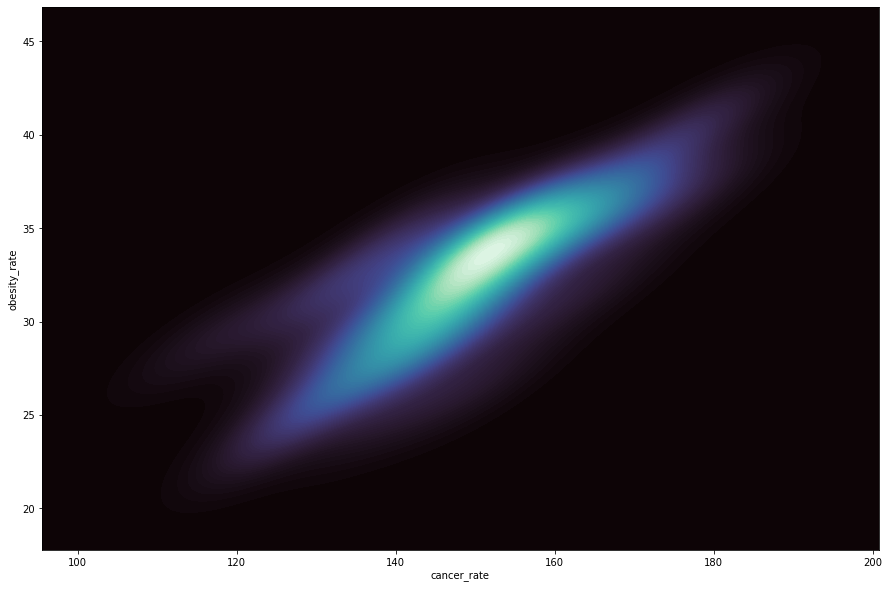

In [589]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df,x="cancer_rate", y="obesity_rate", fill=True, thresh=0, levels=100, cmap="mako")

<AxesSubplot:xlabel='alzheimer_rate', ylabel='obesity_rate'>

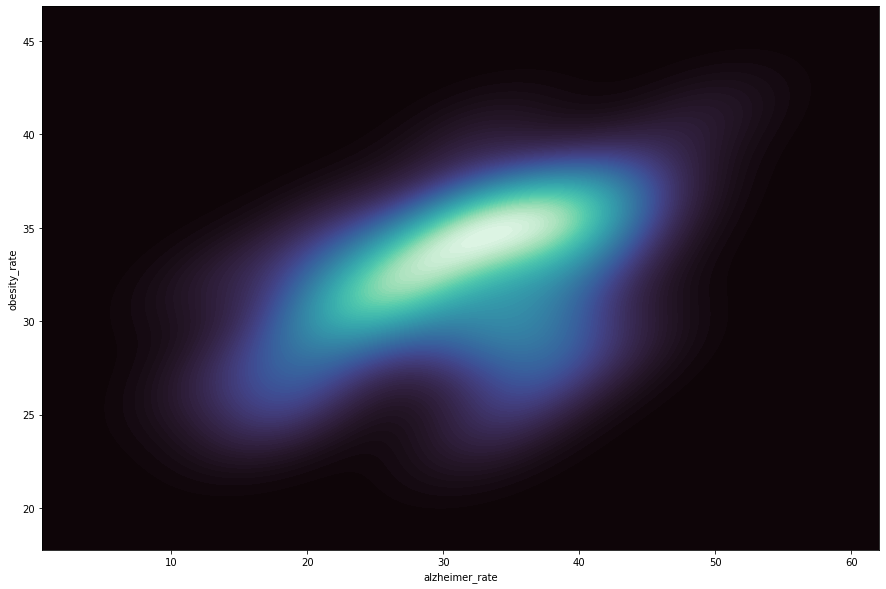

In [590]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df,x="alzheimer_rate", y="obesity_rate", fill=True, thresh=0, levels=100, cmap="mako")

<AxesSubplot:xlabel='diabetes_rate', ylabel='obesity_rate'>

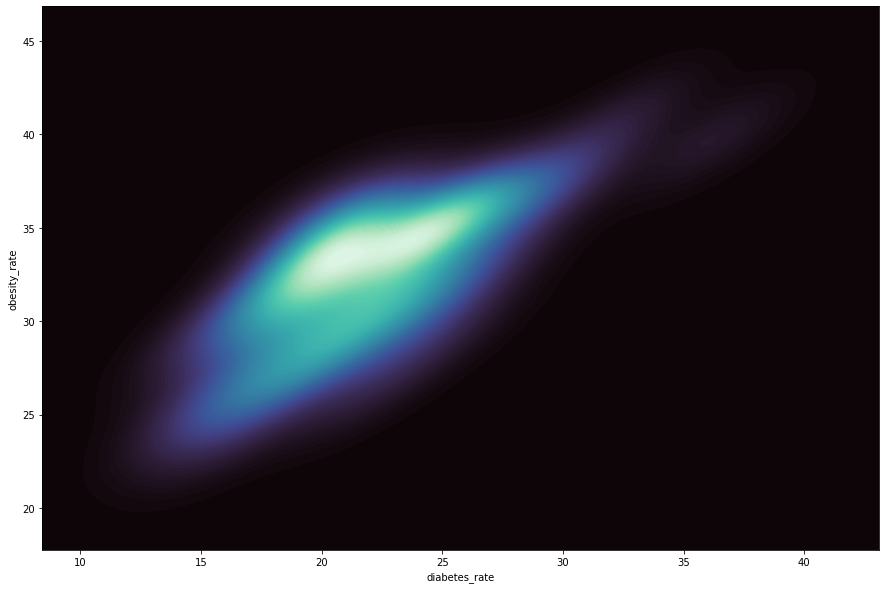

In [591]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df,x="diabetes_rate", y="obesity_rate", fill=True, thresh=0, levels=100, cmap="mako")

<AxesSubplot:xlabel='hypertension_rate', ylabel='obesity_rate'>

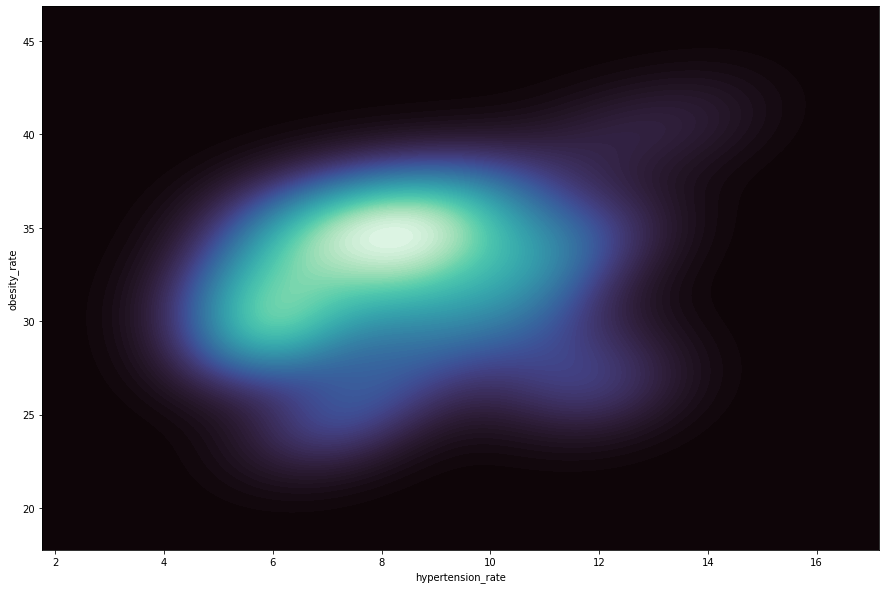

In [593]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=df,x="hypertension_rate", y="obesity_rate", fill=True, thresh=0, levels=100, cmap="mako")

---

- From the following boxplots below, we notice an Alzheimer's rate of 32.3 to be strongly associated with higher rates of Cancer, Diabetes, and Hypertension.

<AxesSubplot:xlabel='alzheimer_rate', ylabel='cancer_rate'>

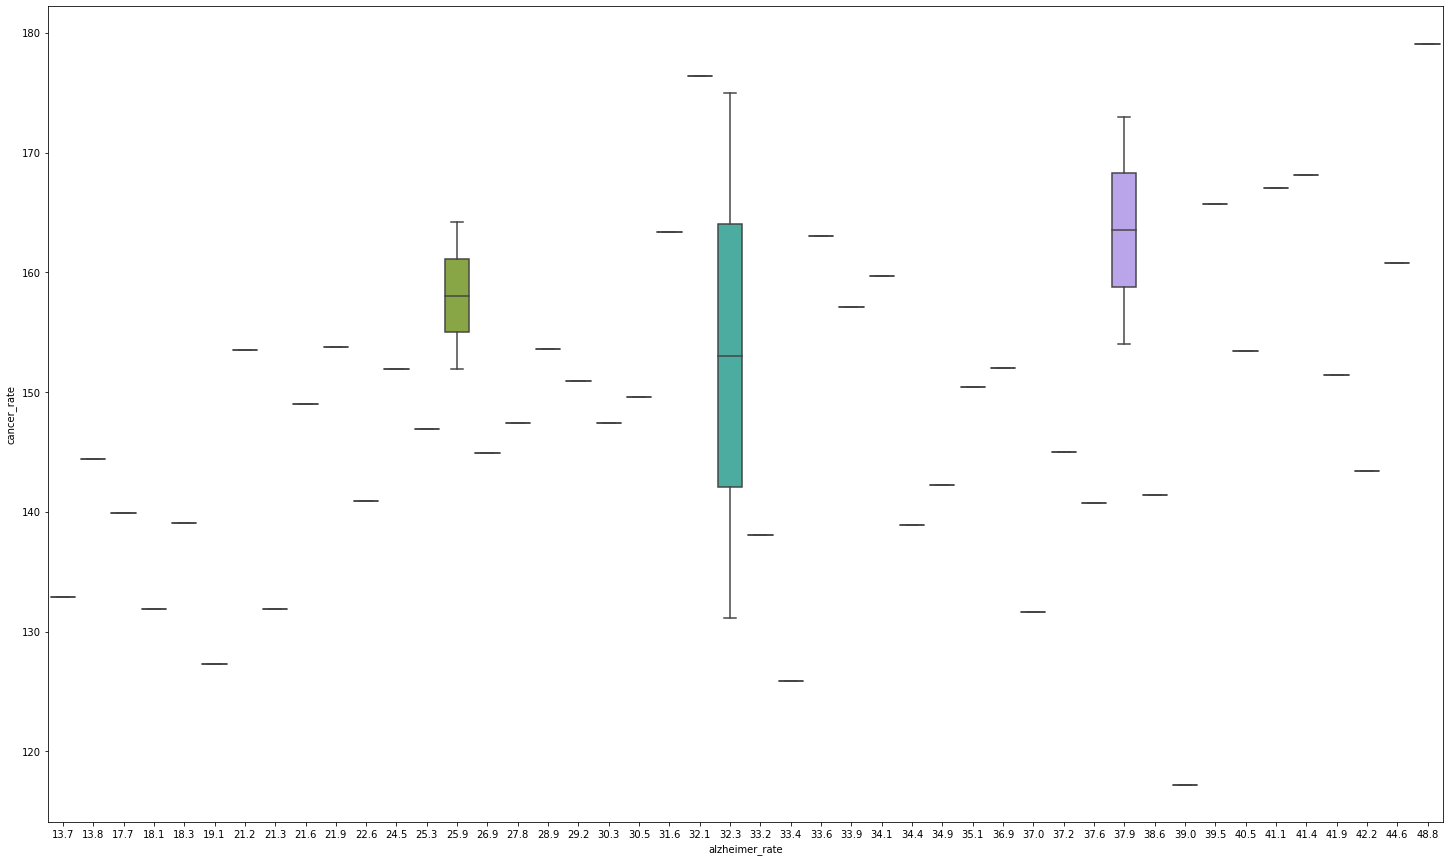

In [609]:
plt.figure(figsize=(25, 15))
sns.boxplot(data=df, x="alzheimer_rate", y="cancer_rate")

<AxesSubplot:xlabel='alzheimer_rate', ylabel='diabetes_rate'>

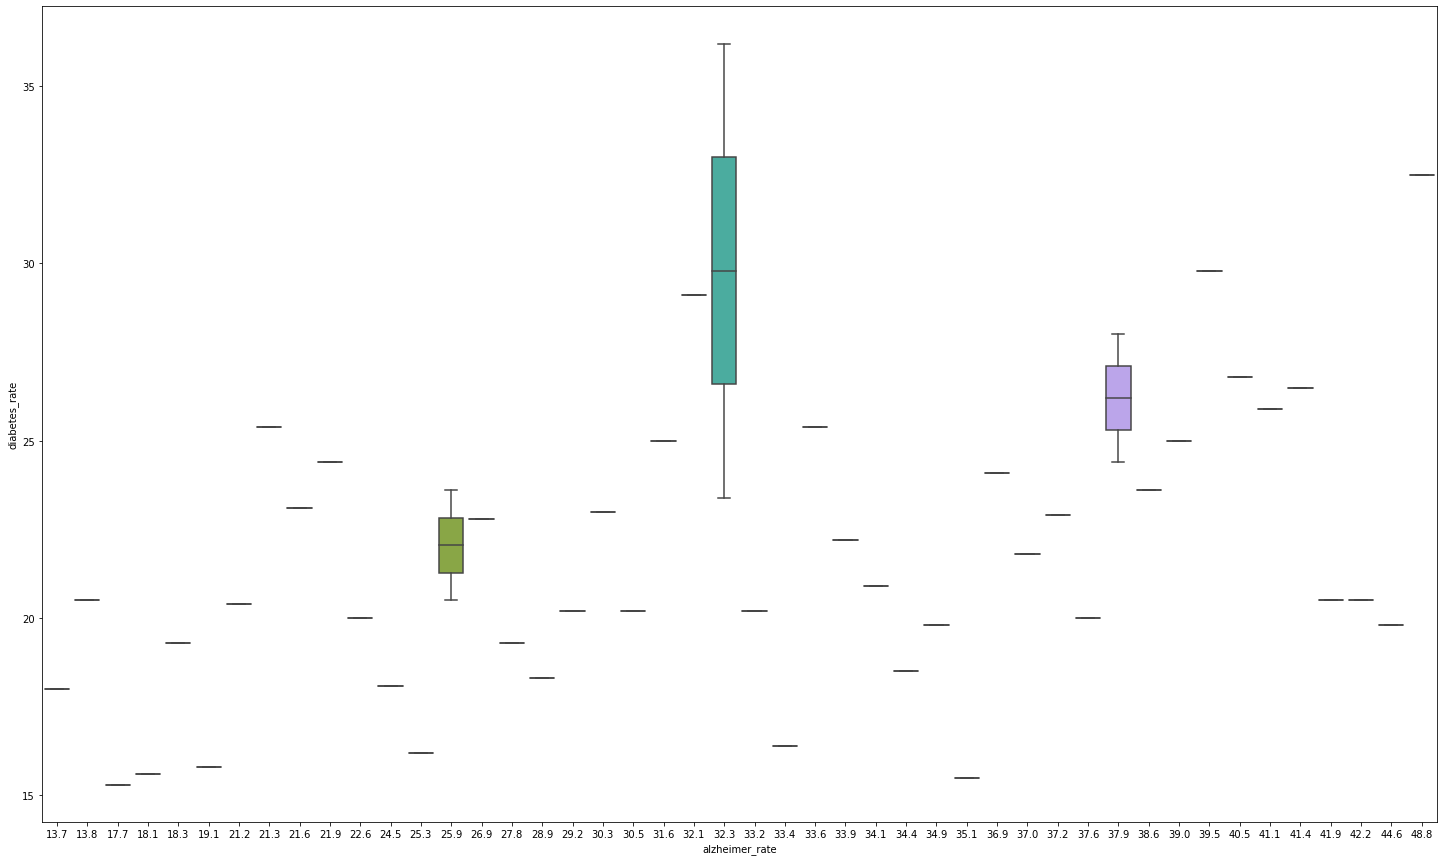

In [611]:
plt.figure(figsize=(25, 15))
sns.boxplot(data=df, x="alzheimer_rate", y="diabetes_rate")

<AxesSubplot:xlabel='alzheimer_rate', ylabel='hypertension_rate'>

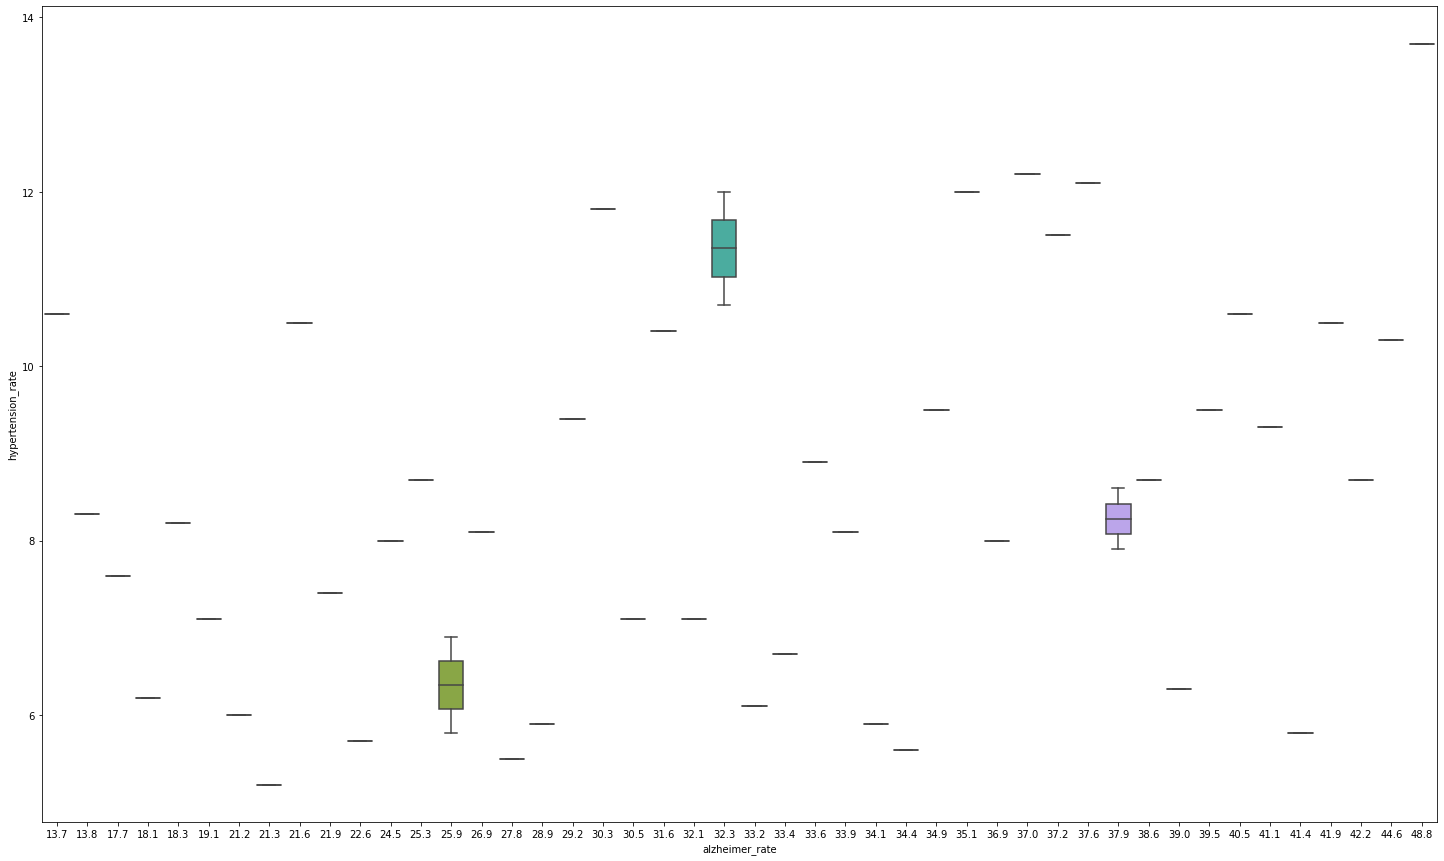

In [612]:
plt.figure(figsize=(25, 15))
sns.boxplot(data=df, x="alzheimer_rate", y="hypertension_rate")

---

## Research Notes:


#### Adiponectin:
- The most abundant gene product secreted by FAT CELLS of the white ADIPOSE TISSUE.
- Adiponectin modulates several physiological processes such as:    
    - Metabolism of glucose and fatty acids.
    - Immune responses.
- Decreased plasma adiponectin  levels are associated with : 
    - Insulin Resistance
    - Type 2 Diabetes Mellitus
    - Obesity
    - Atherosclerosis

* Site : {https://www.ncbi.nlm.nih.gov/mesh/68052242}

---

### Molecular Pathways: Adiponectin and Leptin signaling in cancer: 
- Adipokines are bio-active proteins that mediate metabolism, inflammation, angiogenesis, and proliferation.
    - Angiogenesis : the development of new blood vessels.
    - Proliferation : rapid reproduction of a cell, part, or organism.
- Altered levels of adipokines or their cognate receptors in cancers can ultimately lead to an imbalance in downstream molecular pathways.
- Discovery of adipokine receptors in various cancers has highlighted the potential for novel therapeutic targets.
- Leptin and adiponectin represent two adipokines that are generally8 opposing in molecular effects.
- Studies have shown an association between increased serum leptin levels and increased tumor growth, whereas adiponectin exhibits an inverse correlation with cancer development.

* Site : {https://pubmed.ncbi.nlm.nih.gov/23355630/}

---

### Involvement of Adiponectin and Leptin in breast cancer:
- Leptin mRNA expression was higher than adiponectin mRNA expression in the MCF-7 breast cancer cell line.
- Adiponectin tended to decrease the mRNA expression of leptin.
- Leptin treatment significantly decreased AdipoR1 mRNA.
    - AdipoR1(adiponectin receptor 1) : Gene that encodes a protein which acts as a receptor for adiponectin.  Binding of this proten activates a signaling pathway that affects levels of fatty acid oxidation and insulin sensitivity.
        - Ref : {https://www.ncbi.nlm.nih.gov/gene/51094}
- Adiponectin inhibited proliferation of MCF-7 cells, whereas leptin stimulated the growth of these cancer cells.
- Adiponectin inhibited leptin-induced cell proliferation.
- Adiponectin also reduced the mRNA levels of genes involved in cell cycle regulation, apoptosis, and potential diagnosis/prognosis markers.
- Leptin induced progesterone receptor mRNA expression.
### In conclusion, this study indicates that in MCF-7 breast cancer cells, proliferation is stimulated by leptin and suppressed by adiponectin.

* Site : {https://pubmed.ncbi.nlm.nih.gov/19661131/}

---

### Inverse relationship between Alzheimer's and cancer, and other factors contributing to Alzheimer's :
#### {Study was done using unrestricted access to PUBMED, MEDLINE, and Google Scholar databases for published articles about cellular pathways with roles in cancer, cell survival, growth, proliferation, development, aging, and contributions to Alzheimer's}

#### <u>Background:</u> 
- <u>Etiology</u> of Alzheimer's is not yet properly known.
    - Etiology : The cause, set of causes, or manner of causation of a disease or condition.
- Interactions among environmental factors, multiple susceptibility genes and aging contribute to Alzheimer's.

#### <u>Definitions:</u> 
- The following aspects represent an inverse relationship between Cancer and Alzheimer's : 
    - <u>P53</u> : P53 is an important tumour-suppressor protein that is altered in most cancers.
    - <u>Estrogen</u> : Estrogens are a group of hormones that play an important role in the normal sexual and reproductive development in women. They are also sex hormones.
    - <u>Neurotrophins and growth factors</u> : Eurotrophins are a group of growth factors which have been classically described for their ability to regulate differentiation and to support growth during development of the vertebrate nervous system.
    - <u>Growth and Proliferation</u> : Cell proliferation is the process of generating an increased number of cells through cell division.
    - <u>cAMP</u> : cAMP is a second messenger, used for intracellular signal transduction, such as transferring into cells the effects of hormones like glucagon and adrenaline, which cannot pass through the plasma membrane. It is also involved in the activation of protein kinases.
    - <u>EGFR</u> : {Estimated Glomerular Filtration Rate} rate of how well the kidneys are filtering.
    - <u>Bcl-2</u> : {B-cell lymphoma 2}  Regulator proteins that regulate cell death (apoptosis), by either inhibiting (anti-apoptotic) or inducing (pro-apoptotic) apoptosis.
    - <u>Apoptosis pathways</u> : Activate cell signaling cascades that are an indispensable part of the development and function of an organism.  Responsible for cell death.
    - <u>IGF-1</u> : {Insulin-like Growth Factor 1} Hormone that manages the effects of growth hormone(GH) in your body.
    - <u>HSV</u> : {Herpes Simplex Virus}
    - <u>TDP-43</u> : {Transactive Response DNA Protein 43} involved in processing mRNA molecules which serve as the genetic blueprints for making proteins.
    - <u>APOE variants</u> : The APOE gene is involved in making a protein that helps carry cholesterol and other types of fat in the bloodstream.
    - <u>Notch signals</u> : Helps determine the specialization of cells into certain cell types that perform particular functions in the body (cell fate determination). It also plays a role in cell growth and division (proliferation), maturation (differentiation), and self-destruction (apoptosis).
    - <u>Presenilins</u> : Family of related multi-pass transmembrane proteins which constitute the catalytic subunits of the gamma-secretase intramembrane protease protein complex.
    - <u>NCAM</u> : {Neural Cell Adhesion Molecule} A member of the immunoglobulin protein superfamily implicated in cell recognition and cell–cell adhesion through a homophilic, Ca2+-independent, binding mechanism.
    - <u>TNF alpha</u> : An inflammatory cytokine produced by macrophages/monocytes during acute inflammation and is responsible for a diverse range of signalling events within cells, leading to necrosis or apoptosis.
    - <u>PI3K/AKT/MTOR pathway</u> : Activated in the majority of human cancers. This pathway is known to play a key role in numerous cellular functions including proliferation, adhesion, migration, invasion, metabolism, and survival, but in the current review we focus on its role in angiogenesis.
    - <u>Telomerase</u> : An enzyme made of protein and RNA subunits that elongates chromosomes by adding TTAGGG sequences to the end of existing chromosomes. Telomerase is found in fetal tissues, adult germ cells, and also tumor cells.
    - <u>ROS</u> : {Reactive oxygen species} are highly reactive chemicals formed from oxygen.  They are byproducts of the normal metabolism of oxygen an have roles in cell signaling and homeostasis.
    - <u>ACE levels</u> : The ACE gene provides instructions for making the {angiotensin-converting enzyme}.  This enzyme is able to cut proteins.  Helps regulate blood pressure and balance fluids and salts within the body.
    
#### <u>Results:</u>
- Alzheimer's occurs when brain neurons have weakened growth, cell survival responses, maintenance mechanisms, weakened anti-stress responses such as Vimentin, Carbonic anhydrases, HSPs, SAPK. 
    - In cancer, these responses are up-regulated and maintained. 
- Responses and maintenance mechanisms such as FOXO are impaired in Alzheimer's.
- Countermeasures or compensatory mechanisms by Alzheimer's affected neurons such as Tau, Beta Amyloid, S100, are last attempts for survival which may be protective for certain time, or can speed up Alzheimer's in its micro-environment through C-ABL activation, GSK3, and neuro-inflammation.

#### <u>Conclusions:</u>
- Alzheimer's and Cancer have inverse relationship.
- Factors that up-regulate in any cancer to sustain growth and survival are down-regulated in Alzheimer's disease contributing to neuro-degeneration.
- Aged neurons or genetically susceptible neurons have weakened growth, cell survival and anti-stress responses, age related gene expression changes, altered regulation of cell death and maintenance mechanisms, they contribute to Alzheimer's disease.
- Countermeasures from Alzheimer's neurons such as Beta Amyloid Plaques, NFTs, S100, are last attempts for survival and this provides neuro-protection for a certain time which may become pathological and speed up the development of Alzheimer's.

* Site : {https://pubmed.ncbi.nlm.nih.gov/27875990/}






